# テンソルODE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp 

## Maxwellの応力挙動

連続体を扱うとき，２階のテンソルが頻出する．
例えばMaxwell流体の３次元構成関係を見てみよう，応力$\sigma_{ij}$の時間発展は，$\kappa_{ij}=\nabla_i v_j$は速度勾配，$G$は平衡圧として，以下の形で書ける．
$$
    \frac{{\rm d}\boldsymbol\sigma}{{\rm d} t} = 
    \boldsymbol\kappa\cdot\boldsymbol\sigma + 
    \boldsymbol\sigma\cdot\boldsymbol\kappa^T - (\boldsymbol \sigma-G\boldsymbol I)
$$
こうなると，自分で実装するのは煩わしい．そこで，これもsolve_ivpに解いてもらおう.$xy$方向にせん断変形を与える．

In [2]:
dim = 3
σ = np.eye(dim)
κ = np.zeros_like(σ)
δ = np.eye(dim)
κ[0,1] = 1.0 # xy-shear
init   = σ.flatten()
t_span = [0.0,5.0]
t_eval = np.linspace(*t_span,100) # time for sampling
def maxwell(t,σ,κ):
    σ = σ.reshape(dim,dim)
    dσ = κ.dot(σ) + σ.dot(κ.T) - (σ - δ)
    return dσ.flatten()
sol = solve_ivp(maxwell,t_span,init,method='RK45',t_eval=t_eval,args=(κ,))

maxwell関数内で，受け取った$\sigma$を二次元にreshapeすること， 返り値を一次元で返す必要があることに注意する．

しかし，数式をほとんどそのままの見た目で実装できるのは非常に嬉しい．　

成長せん断粘度$\eta_s = \sigma_{xy}/\kappa_{xy}$を見てみる．

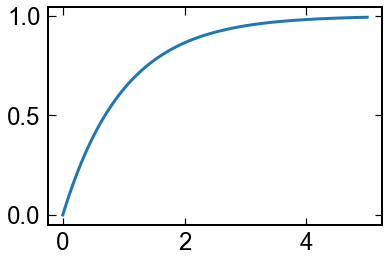

In [3]:
plt.plot(sol.t,sol.y[1]/κ[0,1])

## Giesekusの応力挙動

Giesekus流体に変更してみよう．　構成式は以下の形をしている．
$$
    \frac{{\rm d}\boldsymbol\sigma}{{\rm d} t} = 
    \boldsymbol\kappa\cdot\boldsymbol\sigma + 
    \boldsymbol\sigma\cdot\boldsymbol\kappa^T - (\boldsymbol \sigma-G\boldsymbol I) -
    \alpha(\boldsymbol\sigma - G\boldsymbol I)\cdot (\frac{\boldsymbol\sigma}{G} - \boldsymbol I)
$$
パラメータ$\alpha\in(0,1]$に依存する非線型項を持つ．


In [4]:
dim = 3
σ = np.eye(dim)
κ = np.zeros_like(σ)
δ = np.eye(dim)
α = 0.5
κ[0,1] = 1.0 # xy-shear
init   = σ.flatten()
t_span = [0.0,5.0]
t_eval = np.linspace(*t_span,100) # time for sampling
def giesekus(t,σ,κ,α):
    σ = σ.reshape(dim,dim)
    dσ = κ.dot(σ) + σ.dot(κ.T) - (σ - δ) - α * (σ - δ).dot(σ - δ)
    return dσ.flatten()
sol = solve_ivp(giesekus,t_span,init,method='RK45',t_eval=t_eval,args=(κ,α))

粘度のオーバーシュートと定常値の低減（シアシニング）を観察できる

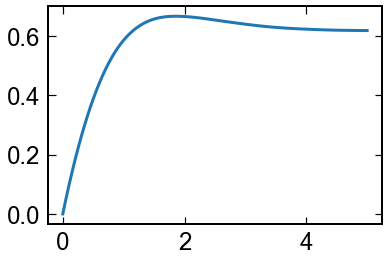

In [5]:
plt.plot(sol.t,sol.y[1]/κ[0,1])